In [1]:
# Import libraries
import pandas as pd

# Load fake and real news datasets
fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

# Add labels: Fake = 0, Real = 1
fake_df['label'] = 0
real_df['label'] = 1

# Combine datasets
df = pd.concat([fake_df, real_df], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display first few rows
df.head()


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [2]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download NLTK stopwords
nltk.download('stopwords')

# Initialize
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Join words back to string
    return " ".join(words)

# Apply cleaning to the 'text' column
df['text'] = df['text'].apply(clean_text)

# Preview cleaned text
df['text'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text
0,21st centuri wire say ben stein reput professo...
1,washington reuter us presid donald trump remov...
2,reuter puerto rico governor ricardo rossello s...
3,monday donald trump embarrass countri accident...
4,glasgow scotland reuter us presidenti candid g...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # limit features for speed

# Fit and transform text
X = vectorizer.fit_transform(df['text']).toarray()

# Target variable
y = df['label']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (35918, 5000)
X_test shape: (8980, 5000)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9870824053452116

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4631   79]
 [  37 4233]]


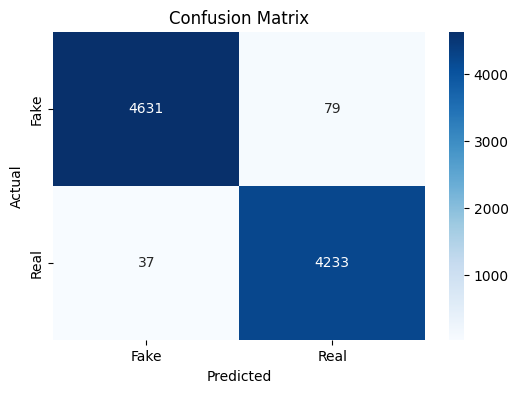

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [6]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.944097995545657

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4710
           1       0.93      0.95      0.94      4270

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

Confusion Matrix (Naive Bayes):
 [[4411  299]
 [ 203 4067]]


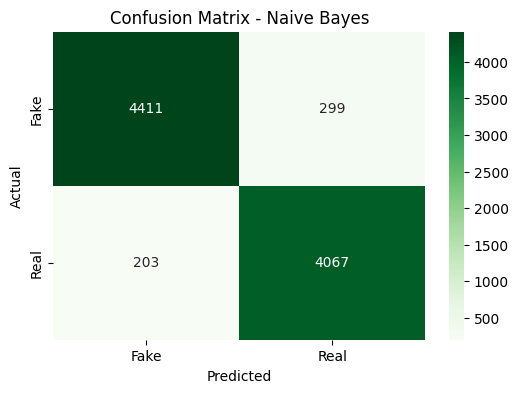

In [7]:
# Plot confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [8]:
import joblib

# Save the Naive Bayes model
joblib.dump(nb_model, "news_classifier_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
